<a href="https://colab.research.google.com/github/Nobel712/Machine-Learning/blob/main/Elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


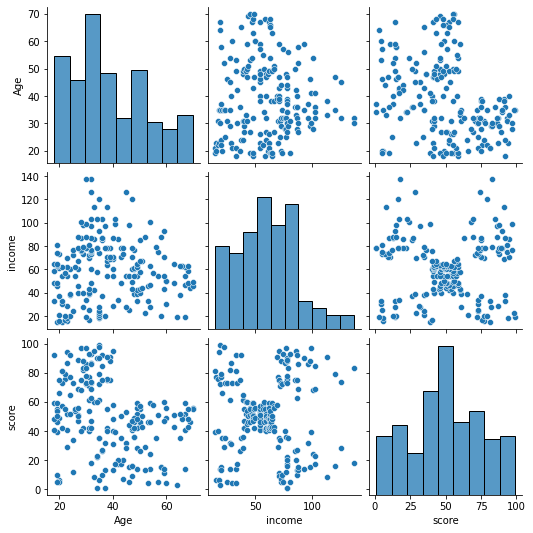

In [ ]:
sns.pairplot(df[['Age','income','score']])

In [ ]:
from sklearn.cluster import KMeans
cl=KMeans(n_clusters=5)

In [ ]:
cl.fit(df[['income','score']])

KMeans(n_clusters=5)

In [ ]:
cl.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [ ]:
df['income_cluster']=cl.labels_

In [ ]:
df.head()

,CustomerID,Gender,Age,income,score,income_cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


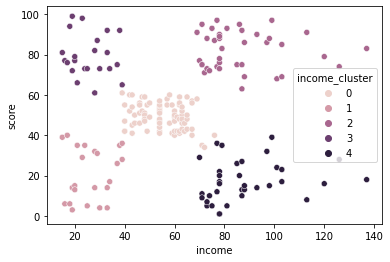

In [ ]:
sns.scatterplot(x='income',y='score',hue='income_cluster',data=df)

In [ ]:
cl.fit(df[['Age','income']])

KMeans(n_clusters=5)

In [ ]:
cl.cluster_centers_

array([[ 37.69642857,  78.51785714],
       [ 56.49019608,  49.80392157],
       [ 30.21428571,  27.07142857],
       [ 36.6       , 109.7       ],
       [ 25.06451613,  59.48387097]])

In [ ]:
df['age_cluster']=cl.labels_

In [ ]:
df.head()

,CustomerID,Gender,Age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,3,2
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,3,2
4,5,Female,31,17,40,1,2


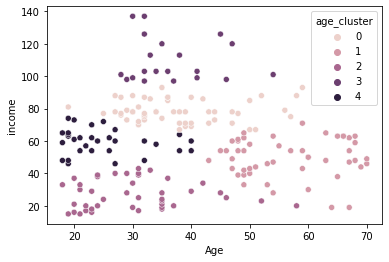

In [ ]:
sns.scatterplot(x='Age',y='income',hue='age_cluster',data=df)

In [ ]:
K_range=range(1,12)
wcss=[]

In [ ]:
for k in K_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['income','score']])
  wcss.append(km.inertia_)

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30273.394312070042,
 25022.48500453035,
 23245.079065787148,
 19657.78360870395,
 17518.64345656769]

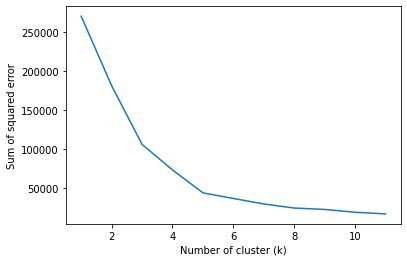

In [ ]:
plt.xlabel('Number of cluster (k)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss)